### Simulation
* basics of random variables
* simulation for probability
* data generating process
* resampling methods
* Monte Carlo integration
https://campus.datacamp.com/courses/statistical-simulation-in-python

**Simulation:Characterized by repeated random sampling.**

Steps:
1. Define possible outcomes for random variables.
2. Assign probabilities.
3. Define relationships between random variables.
4. Get multiple outcomes by repeated random sampling.
5. Analyze sample outcomes.

In [61]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:

# Set the seed
np.random.seed(123)

# Generate and print random float
print(np.random.rand())

# Use randint() to simulate a dice (integer only, 7 is not included)
print(np.random.randint(1,7))

0.6964691855978616
3


In [3]:
# empire state building example
# Starting step
step = 50

# Roll the dice
dice = np.random.randint(1,7)

# Finish the control construct
if dice <= 2 :
    step = step - 1
elif dice <= 5 :
    step = step + 1
else :
    step = step + np.random.randint(1,7)

# Print out dice and step
print(dice)
print(step)

5
51


[0, 1, 0, 1, 2, 3, 2, 1, 0, 0, 0, 0, 0, 0, 1, 6, 5, 4, 5, 4, 5, 6, 7, 8, 9, 8, 9, 8, 9, 10, 11, 12, 11, 15, 16, 15, 16, 15, 16, 17, 18, 19, 20, 21, 22, 25, 26, 27, 28, 33, 34, 38, 39, 38, 39, 40, 39, 40, 41, 43, 44, 45, 44, 43, 44, 45, 44, 43, 44, 45, 47, 46, 45, 46, 45, 46, 47, 48, 50, 49, 50, 51, 52, 53, 54, 53, 52, 53, 52, 53, 54, 53, 56, 57, 58, 59, 58, 59, 60, 64, 63]


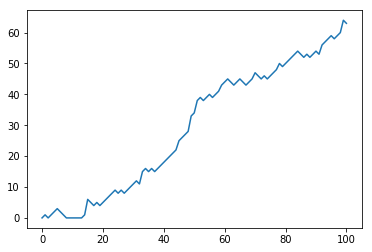

In [4]:
# Numpy is imported, seed is set

# Initialize random_walk
random_walk = [0] #list with 0 have to with []

for x in range(100) :
    step = random_walk[-1]
    dice = np.random.randint(1,7)

    if dice <= 2:
        # Replace below: use max to make sure step can't go below 0
        step = max(0,step - 1)  #use max to make sure step can't go below 0
    elif dice <= 5:
        step = step + 1
    else:
        step = step + np.random.randint(1,7)

    random_walk.append(step)

print(random_walk)

# Plot random_walk
plt.plot(random_walk) # plt.plot(x,y) : index of the list to map onto the x axis, and the values in the list onto the y axis.

# Show the plot
plt.show()

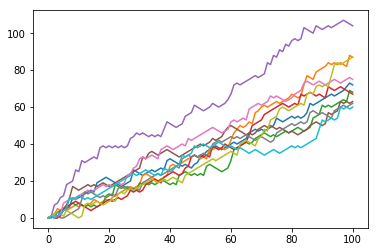

In [5]:
# Numpy is imported; seed is set

# Initialize all_walks
all_walks = []

# Simulate random walk 10 times
for i in range(10) :

    # Code from before
    random_walk = [0]
    for x in range(100) :
        step = random_walk[-1]
        dice = np.random.randint(1,7)

        if dice <= 2:
            step = max(0, step - 1)
        elif dice <= 5:
            step = step + 1
        else:
            step = step + np.random.randint(1,7)
        random_walk.append(step)

    # Append random_walk to all_walks
    all_walks.append(random_walk)

# print(all_walks)

# Convert all_walks to Numpy array: np_aw
np_aw = np.array(all_walks)

# Clear the figure : plt.clf()

# Transpose np_aw: np_aw_t. Now every row in np_all_walks represents the position after 1 throw for the 10 random walks.
np_aw_t = np.transpose(np_aw)

# Plot np_aw_t and show
plt.plot(np_aw_t)
plt.show()

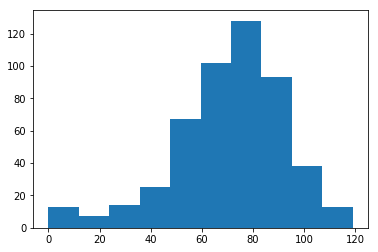

In [7]:
# plot distribution

# Simulate random walk 500 times
all_walks = []
for i in range(500) :
    random_walk = [0]
    for x in range(100) :
        step = random_walk[-1]
        dice = np.random.randint(1,7)
        if dice <= 2:
            step = max(0, step - 1)
        elif dice <= 5:
            step = step + 1
        else:
            step = step + np.random.randint(1,7)
        if np.random.rand() <= 0.001 :
            step = 0
        random_walk.append(step)
    all_walks.append(random_walk)

# Create and plot np_aw_t
np_aw_t = np.transpose(np.array(all_walks))

# Select last row from np_aw_t: ends
ends=np_aw_t[-1]

# Plot histogram of ends, display plot
plt.hist(ends)
plt.show()

### Simulating the dice game


In [9]:
# Define die outcomes and probabilities
die, probabilities, throws = [1,2,3,4,5,6], [1/6, 1/6, 1/6, 1/6, 1/6, 1/6], 1

# Use np.random.choice to throw the die once and record the outcome
outcome = np.random.choice(die, size=throws, p=probabilities)
print("Outcome of the throw: {}".format(outcome[0]))

Outcome of the throw: 2


In [25]:
# Initialize number of dice, simulate & record outcome
die, probabilities, num_dice = [1,2,3,4,5,6], [1/6, 1/6, 1/6, 1/6, 1/6, 1/6], 2
outcomes = np.random.choice(die, size=num_dice, p=probabilities) 

# Win if the two dice show the same number
if outcomes[0] == outcomes[1]:
    answer = 'win' 
else: 
    answer = 'lose'

print("The dice show {} and {}. You {}!".format(outcomes[0], outcomes[1], answer))
print(type(outcomes))

The dice show 2 and 3. You lose!
<class 'numpy.ndarray'>


In [26]:
# Initialize model parameters & simulate dice throw
die, probabilities, num_dice = [1,2,3,4,5,6], [1/6, 1/6, 1/6, 1/6, 1/6, 1/6], 2
sims, wins = 100, 0

for i in range(sims):
    outcomes = np.random.choice(die, size=num_dice, p=probabilities) 
    # Increment `wins` by 1 if the dice show same number
    if outcomes[0] == outcomes[1]:
        wins = wins + 1

print("In {} games, you win {} times".format(sims, wins))

In 100 games, you win 14 times


#### Using simulation for decision-making
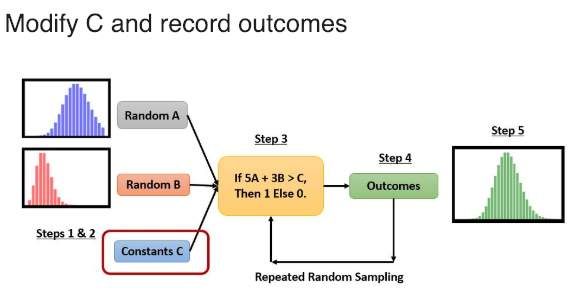
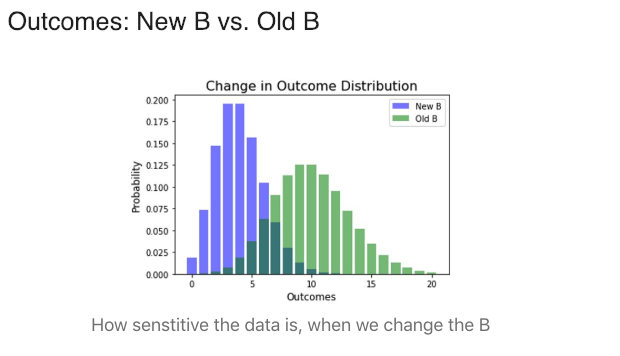

Should I buy lottery?

In [27]:
#Simulating one lottery drawing
# Pre-defined constant variables
lottery_ticket_cost, num_tickets, grand_prize = 10, 1000, 1000000

# Probability of winning
chance_of_winning = 1/num_tickets

# Simulate a single drawing of the lottery
gains = [-lottery_ticket_cost, grand_prize-lottery_ticket_cost]

#which includes the probability of winning the lottery, as defined by chance_of_winning and its complement.
probability = [1-chance_of_winning, chance_of_winning]
outcome = np.random.choice(a=gains, size=1, p=probability, replace=True)

print("Outcome of one drawing of the lottery is {}".format(outcome))

Outcome of one drawing of the lottery is [-10]


Is it worth spending $10 on the ticket for this average payoff?

In [28]:
# Initialize size and simulate outcome
lottery_ticket_cost, num_tickets, grand_prize = 10, 1000, 1000000
chance_of_winning = 1/num_tickets
size = 2000
payoffs = [-lottery_ticket_cost, grand_prize-lottery_ticket_cost]
probs = [1-chance_of_winning,chance_of_winning]

outcomes = np.random.choice(a=payoffs, size=size, p=probs, replace=True)

# Mean of outcomes.
answer = outcomes.mean()
print("Average payoff from {} simulations = {}".format(size, answer))

Average payoff from 2000 simulations = 490.0


Calculating a break-even lottery price

Simulations allow us to ask more nuanced questions that might not necessarily have an easy analytical solution. Rather than solving a complex mathematical formula, we directly get multiple sample outcomes. We can run experiments **by modifying inputs and studying how those changes impact the system**. 

In the lottery example, we might want to know how expensive the ticket needs to be for it to not make sense to buy it. To understand this, we need to modify the ticket cost to see when the expected payoff is negative.v

In [29]:
# Initialize simulations and cost of ticket
sims, lottery_ticket_cost = 3000, 0

# Use a while loop to increment `lottery_ticket_cost` till average value of outcomes falls below zero
while 1:
    outcomes = np.random.choice([-lottery_ticket_cost, grand_prize-lottery_ticket_cost],
                 size=sims, p=[1-chance_of_winning, chance_of_winning], replace=True)
    if outcomes.mean() < 0:
        break
    else:
        lottery_ticket_cost += 1
answer = lottery_ticket_cost - 1

print("The highest price at which it makes sense to buy the ticket is {}".format(answer))

The highest price at which it makes sense to buy the ticket is 19


## Probability


 basics:Sample Space S: Set of all possible outcomes
Probability P(A): Likelihood of event A

0 ≤ P(A) ≤ 1
P(S) = 1 eg. P(H) + P(T) =1

P(A∪B)=P(A)+P(B)−P(A∩B) 

**Steps for Estimating Probability by using Simulation :**
1. Construct sample space or population.
2. Determine how to simulate one outcome.
3. Determine rule for success.
4. Sample repeatedly and count successes.
5. Calculate frequency of successes as an estimate of probability.

What is the probability that one is a spade and one is a heart?
https://www.quora.com/Two-cards-are-drawn-from-a-deck-of-52-cards-What-is-the-probability-that-one-is-a-spade-and-one-is-a-heart

In [32]:
# how to use simulation to calculate probabilities for card games.
deck_of_cards[0:5]

[('Heart', 0), ('Heart', 1), ('Heart', 2), ('Heart', 3), ('Heart', 4)]

In this variation of the game, you are dealt five cards and the player with the better hand wins. You will use a simulation to estimate the probabilities of getting certain hands

In [33]:
# Shuffle deck & count card occurrences in the hand
n_sims, two_kind = 10000, 0
for i in range(n_sims):
    np.random.shuffle(deck_of_cards)
    hand, cards_in_hand = deck_of_cards[0:5], {}
    for card in hand:
        # Use dict.get(key[, value]) 
        cards_in_hand[card[1]] = cards_in_hand.get(card[1], 0) + 1
    
    # Condition for getting at least 2 of a kind
    highest_card = max(cards_in_hand.values())
    if  highest_card>=2: 
        two_kind += 1

print("Probability of seeing at least two of a kind = {} ".format(two_kind/n_sims))

Probability of seeing at least two of a kind = 0.4823 


In [34]:
##Game of thirteen:You win the game if you get through all the cards without any coincidences.
# Pre-set constant variables
deck, sims, coincidences = np.arange(1, 14), 10000, 0

for _ in range(sims):
    # Draw all the cards without replacement to simulate one game
    draw = np.random.choice(deck, size=13, replace=False) 
    # Check if there are any coincidences
    coincidence = (draw == list(np.arange(1, 14))).any()
    if coincidence == True:
        coincidences += 1

# Calculate probability of winning:the fraction of games without any coincidences.
print("Probability of winning = {}".format(1-coincidences/sims))

Probability of winning = 0.3741


The conditional urn:
We have an urn that contains 7 white and 6 black balls. Four balls are drawn at random. We'd like to know the probability that the first and third balls are white, while the second and the fourth balls are black.

In [38]:
# Initialize success, sims and urn
success, sims = 0, 5000
urn = ['w']*7 + ['b']*6
#print(urn) list ['w', 'w', 'w', 'w', 'w', 'w', 'w', 'b', 'b', 'b', 'b', 'b', 'b']

for _ in range(sims):
    # Draw 4 balls without replacement
    draw = np.random.choice(urn, replace=False, size=4)
    # Count the number of successes
    if (draw[0] == 'w') & (draw[1] == 'b') & (draw[2] == 'w') & (draw[3] == 'b'):
        success +=1

print("Probability of success = {}".format(success/sims))

Probability of success = 0.0684


**Birthday problem:** How many people do you need in a room to ensure at least a 50% chance that two of them share the same birthday?

With 366 people in a 365-day year, we are 100% sure that at least two have the same birthday, but we only need to be 50% sure. Simulation gives us an elegant way of solving this problem.

In [41]:
# Draw a sample of birthdays & check if each birthday is unique
days = np.arange(1,366)
people = 2

def birthday_sim(people):
    sims, unique_birthdays = 2000, 0 
    for _ in range(sims):
        draw = np.random.choice(days, size=people, replace=True) 
        if len(draw) == len(set(draw)): 
            unique_birthdays += 1
    out = 1 - unique_birthdays / sims
    return out

In [42]:
# Break out of the loop if probability greater than 0.5
while (people > 0):
    prop_bds = birthday_sim(people)
    if prop_bds > 0.5: 
        break
    people += 1

print("With {} people, there's a 50% chance that two share a birthday.".format(people))

With 23 people, there's a 50% chance that two share a birthday.


**Data generating process**

1. Define Possible Outcomes for Random Variables. 
2. Assign Probabilities.
3. Define Relationships between Random Variables.

Driving test:you will simulate a very simple DGP. Suppose that you are about to take a driving test tomorrow. Based on your own practice and based on data you have gathered, you know that the probability of you passing the test is 90% when it's sunny and only 30% when it's raining. Your local weather station forecasts that there's a 40% chance of rain tomorrow. Based on this information, you want to know what is the probability of you passing the driving test tomorrow.

Conditional Probability

In [45]:
sims, outcomes, p_rain, p_pass = 1000, [], 0.40, {'sun':0.9, 'rain':0.3}

def test_outcome(p_rain):
    # Simulate whether it will rain or not
    weather = np.random.choice(['rain', 'sun'], p=[p_rain, 1-p_rain])
    # Simulate and return whether you will pass or fail
    return np.random.choice(['pass', 'fail'], p=[p_pass[weather], 1-p_pass[weather]])

In [46]:
for _ in range(sims):
    outcomes.append(test_outcome(p_rain))

# Calculate fraction of outcomes where you pass
print("Probability of Passing the driving test = {}".format(sum([x == 'pass' for x in outcomes])/len(outcomes)))

Probability of Passing the driving test = 0.666


National elections
：Consider national elections in a country with two political parties - Red and Blue. This country has 50 states and the party that wins the most states wins the elections. You have the probability p of Red winning in each individual state and want to know the probability of Red winning nationally.
**what is the probability of Red winning less than 45% of the states?**

In [48]:
p=np.array([0.52076814, 0.67846401, 0.82731745, 0.64722761, 0.03665174,
       0.17835411, 0.75296372, 0.22206157, 0.72778372, 0.28461556,
       0.72545221, 0.106571  , 0.09291364, 0.77535718, 0.51440142])

In [49]:
outcomes, sims, probs = [], 1000, p

for _ in range(sims):
    # Simulate elections in the 50 states
    election = np.random.binomial(p=probs, n=1)
    # Get average of Red wins and add to `outcomes`
    outcomes.append(election.mean())

# Calculate probability of Red winning in less than 45% of the states
print("Probability of Red winning in less than 45% of the states = {}".format(sum([(x < 0.45) for x in outcomes])/len(outcomes)))

Probability of Red winning in less than 45% of the states = 0.33


Fitness goals
Let's model how activity levels impact weight loss using modern fitness trackers. On days when you go to the gym, you average around 15k steps, and around 5k steps otherwise. You go to the gym 40% of the time. Let's model the step counts in a day as a Poisson random variable with a mean λ dependent on whether or not you go to the gym.

For simplicity, let’s say you have an 80% chance of losing 1lb and a 20% chance of gaining 1b when you get more than 10k steps. The probabilities are reversed when you get less than 8k steps. Otherwise, there's an even chance of gaining or losing 1lb. Given all this, find the probability of losing weight in a month.

In [50]:
# Simulate steps & choose prob 
for _ in range(sims):
    w = []
    for i in range(days):
        lam = np.random.choice([5000, 15000], p=[0.6, 0.4], size=1)
        steps = np.random.poisson(lam)
        if steps > 10000: 
            prob = [0.2, 0.8]
        elif steps < 8000: 
            prob = [0.8, 0.2]
        else:
            prob = [0.5, 0.5]
        w.append(np.random.choice([1, -1], p=prob))
    outcomes.append(sum(w))

# Calculate fraction of outcomes where there was a weight loss
print("Probability of Weight Loss = {}".format(sum([x < 0 for x in outcomes])/len(outcomes)))

TypeError: only integer scalar arrays can be converted to a scalar index

#### eCommerce Ad Simulation

On any day, we get many ad impressions, which can be modeled as Poisson random variables (RV). You are told that λ is normally distributed with a mean of 100k visitors and standard deviation 2000.

During the signup journey, the customer sees an ad, decides whether or not to click, and then whether or not to signup. Thus both clicks and signups are binary, modeled using *binomial RVs*. What about probability p of success? Our current low-cost option gives us a click-through rate of 1% and a sign-up rate of 20%. A higher cost option could increase the clickthrough and signup rate by up to 20%, but we are unsure of the level of improvement, so we model it as a uniform RV.

**Sign up Flow:**

In [5]:
# Initialize click-through rate and signup rate dictionaries, 20% increase 
ct_rate = {'low':0.01, 'high':np.random.uniform(low=0.01, high=1.2*0.01)}
su_rate = {'low':0.2, 'high':np.random.uniform(low=0.2, high=1.2*0.2)}

def get_signups(cost, ct_rate, su_rate, sims):
    #Simulate steps as a Poisson random variable for a given day based on the value of lam.
    lam = np.random.normal(loc=100000, scale=2000, size=sims)
    # Simulate impressions(poisson), clicks(binomial) and signups(binomial)
    impressions = np.random.poisson(lam=lam)
    clicks = np.random.binomial(impressions, p=ct_rate[cost])
    signups = np.random.binomial(clicks, p=su_rate[cost])
    return signups

print("Simulated Signups = {}".format(get_signups('high', ct_rate, su_rate, 1)))

Simulated Signups = [220]


**Purchase Flow**

Once the customer has signed up, they decide whether or not to purchase - a natural candidate for a binomial RV. Let's assume that *10% of signups* result in a purchase.

Although customers can make many purchases, let's assume one purchase. The purchase value could be modeled by any continuous RV, but one nice candidate is the *exponential RV*. Suppose we know that purchase value per customer has averaged around $1000. We use this information to create the purchase_values RV. The revenue, then, is simply the sum of all purchase values.

In [6]:
def get_revenue(signups):
    rev = []
    np.random.seed(123)
    for s in signups:
        # Model purchases as binomial, purchase_values as exponential
        purchases = np.random.binomial(s, p=0.1)
        purchase_values = np.random.exponential(scale=1000, size=purchases)
        
        # Append to revenue the sum of all purchase values.
        rev.append(purchase_values.sum())
    return rev

print("Simulated Revenue = ${}".format(get_revenue(get_signups('low', ct_rate, su_rate, 1))[0]))

Simulated Revenue = $22014.194422934448


#### Probability of losing money
This company has the option of spending extra money, let's say $3000 , to redesign the ad. This could potentially get them higher clickthrough and signup rates, but this is not guaranteed. We would like to know whether or not to spend this extra $3000 by calculating the probability of losing money. In other words, the probability that the revenue from the high-cost option minus the revenue from the low-cost option is lesser than the cost.

This simple yet powerful framework forms the basis of Bayesian methods for getting probabilities.

In [7]:
# Initialize sims
sims, cost_diff = 10000, 3000

# Get revenue when the cost is 'low' and when the cost is 'high'
rev_low = get_revenue(get_signups('low', ct_rate, su_rate, sims))
rev_high = get_revenue(get_signups('high', ct_rate, su_rate, sims))

# calculate fraction of times rev_high - rev_low is less than cost_diff
print("Probability of losing money = {}".format(sum([rev_high[i] - rev_low[i] < cost_diff for i in range(len(rev_low))])/len(rev_low)))

Probability of losing money = 0.5163


### Resampling

Advantage
* Simple implementation procedure
* Applicable to complex estimators.
* No strict assumptions.

Drawbacks
* Computationally expensive

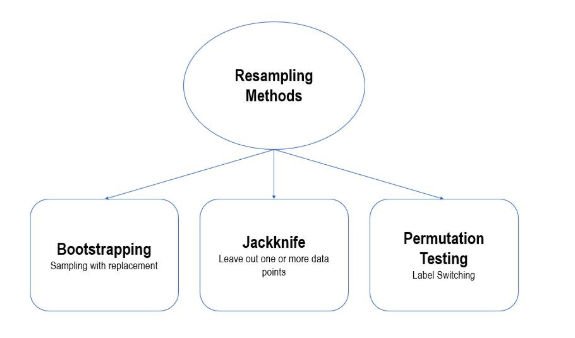
Bootstrap vs. Jackknife: sampling with replacement vs. leave out one observation at a time.
https://stats.stackexchange.com/questions/21023/bootstrap-vs-jackknife

**Intro**: You are given multiple variations of np.random.choice() for sampling from arrays. Look at each variation carefully and select the one that could generate the output. ['a', 'c', 'c'] as an output.

In [ ]:
np.random.choice(['a', 'b', 'c', 'd', 'e'], size=5, replace=True)[:3]

#### Probability example
Consider a bowl filled with colored candies - three blue, two green, and five yellow. Draw three candies at random, with replacement and without replacement. You want to know the probability of drawing a yellow candy on the third draw given that the first candy was blue and the second candy was green.And, does the difference between sampling with and without replacement make sense now?

In [11]:
# Set up the bowl
success_rep, success_no_rep, sims = 0, 0, 10000
bowl = list('b'*3 + 'g'*2 + 'y'*5)

for i in range(sims):
    # Sample with and without replacement & increment success counters
    sample_rep = np.random.choice(bowl, size=3, replace=True)
    sample_no_rep = np.random.choice(bowl, size=3, replace=False)
    if (sample_rep[0] == 'b') & (sample_rep[1] == 'g') & (sample_rep[2] == 'y'): 
        success_rep += 1
    if (sample_no_rep[0] == 'b') & (sample_no_rep[1] == 'g') & (sample_no_rep[2] == 'y'): 
        success_no_rep += 1

# Calculate probabilities
print("Probability with replacement = {}, without replacement = {}".format(success_rep/sims, success_no_rep/sims))

Probability with replacement = 0.0317, without replacement = 0.0432


In [ ]:
# Running a simple bootstrap
# Draw some random sample with replacement and append mean to mean_lengths.
mean_lengths, sims = [], 1000
for i in range(sims):
    temp_sample = np.random.choice(wrench_lengths, replace=True, size=len(wrench_lengths))
    sample_mean = np.mean(temp_sample)
    mean_lengths.append(sample_mean)
    
# Calculate bootstrapped mean and 95% confidence interval.
print("Bootstrapped Mean Length = {}, 95% CI = {}".format(np.mean(mean_lengths), np.percentile(mean_lengths, [2.5, 97.5])))

Suppose you are studying the health of students. You are given the height and weight of 1000 students (dataframe :df)and are interested in the median height as well as the correlation between height and weight and the associated 95% CI for these quantities. Let's use bootstrapping.

In [ ]:
# Non-standard estimators
# Sample with replacement and calculate quantities of interest
sims, data_size, height_medians, hw_corr = 1000, df.shape[0], [], []
for i in range(sims):
    tmp_df = df.sample(n=data_size, replace=True)
    height_medians.append(tmp_df['heights'].median())
    hw_corr.append(tmp_df.weights.corr(tmp_df.heights))

# Calculate confidence intervals
print("Height Median CI = {} \nHe`ight Weight Correlation CI = {}".format(np.percentile(height_medians, [2.5, 97.5]) , np.percentile(hw_corr, [2.5, 97.5])))

In [ ]:
# Bootstrapping regression
import statmodel as sm
rsquared_boot, coefs_boot, sims = [], [], 1000
reg_fit = sm.OLS(df['y'], df.iloc[:,1:]).fit()

# Run 1K iterations
for i in range(sims):
    # First create a bootstrap sample with replacement with n=df.shape[0]
    bootstrap = df.sample(n=df.shape[0], replace=True)
    # Fit the regression and append the r square to rsquared_boot
    rsquared_boot.append(sm.OLS(bootstrap['y'],bootstrap.iloc[:,1:]).fit().rsquared)

# Calculate 95% CI on rsquared_boot
print("R Squared 95% CI = {}".format(np.percentile(rsquared_boot, [2.5, 97.5])))

Jackknife

In [ ]:
# Leave one observation out from wrench_lengths to get the jackknife sample and store the mean length
mean_lengths, n = [], len(wrench_lengths)
index = np.arange(n)

for i in range(n):
    jk_sample = wrench_lengths[index != i]
    mean_lengths.append(np.mean(jk_sample))

# The jackknife estimate is the mean of the mean lengths from each sample
mean_lengths = np.array(mean_lengths)
print("Jackknife estimate of the mean = {}".format(np.mean(mean_lengths)))

In [ ]:
# Leave one observation out to get the jackknife sample and store the median length
median_lengths = []
for i in range(n):
    jk_sample = wrench_lengths[index != i]
    median_lengths.append(np.median(jk_sample))

median_lengths = np.array(median_lengths)

# Calculate jackknife estimate and it's variance
jk_median_length = np.mean(median_lengths)
jk_var = (n-1)*np.var(median_lengths)

# Assuming normality, calculate lower and upper 95% confidence intervals
print("Jackknife 95% CI lower = {}, upper = {}".format(jk_median_length - 1.96*np.sqrt(jk_var), jk_median_length + 1.96*np.sqrt(jk_var)))

**Permutation Test:**

to obtain the distribution of the test statistics under the null without making any strong assumption as opposed to classical tests (t-test, chi-square test) which relies on probability distributions.

Non-paratrametic test. only assumption is all treatments group to be very similar

In [17]:
# Generating a single permutation
# Concatenate the two arrays donations_A and donations_B into data
len_A, len_B = len(donations_A), len(donations_B)
data = np.concatenate([donations_A, donations_B])

# Get a single permutation of the concatenated length
perm = np.random.permutation(len(donations_A) + len(donations_B))

# Calculate the permutated datasets and difference in means
permuted_A = data[perm[:len(donations_A)]]
permuted_B = data[perm[len(donations_A):]]
print("Difference in the permuted mean values = {}.".format(np.mean(permuted_A)-np.mean(permuted_B)))

In [14]:
arr = np.arange(9).reshape((3, 3))
arr

array([[0, 1, 2],
       [3, 4, 5],
       [6, 7, 8]])

In [ ]:
# Generate permutations equal to the number of repetitions
perm = np.array([np.random.permutation(len(donations_A) + len(donations_B)) for i in range(reps)])
permuted_A_datasets = data[perm[:, :len(donations_A)]]
permuted_B_datasets = data[perm[:, len(donations_A):]]

# Calculate the difference in means for each of the datasets
samples = np.mean(permuted_A_datasets, axis=1) - np.mean(permuted_B_datasets, axis=1)

# Calculate the test statistic and p-value: as twice the fraction of cases where the difference is greater than or equal to the absolute value of the test statistic (2-sided hypothesis). 
test_stat = np.mean(donations_A) - np.mean(donations_B)
print("p-value = {}".format(2*np.sum(samples >= np.abs(test_stat))/reps))

In [ ]:
# Calculate the difference in 80th percentile and median for each of the permuted datasets (A and B)
samples_percentile = np.percentile(permuted_A_datasets, 80, axis=1) - np.percentile(permuted_B_datasets, 80, axis=1)
samples_median = np.median(permuted_A_datasets, axis=1) - np.median(permuted_B_datasets, axis=1)

# Calculate the test statistic from the original dataset and corresponding p-values
test_stat_percentile = np.percentile(donations_A, 80) - np.percentile(donations_B, 80)
test_stat_median = np.median(donations_A) - np.median(donations_B)

print("80th Percentile: test statistic = {}, p-value = {}".format(test_stat_percentile, 2*np.sum(samples_percentile >= np.abs(test_stat_percentile))/reps))
print("Median: test statistic = {}, p-value = {}".format(test_stat_median, 2*np.sum(samples_median >= np.abs(test_stat_median))/reps))

### Simulation

1. Simulation for Business Planning
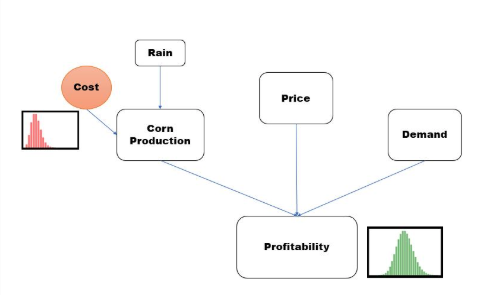
Given the basic model, you can vary the cost input and track the impact on profitability

Suppose that you manage a small corn farm and are interested in optimizing your costs. Let's assume that corn production depends on only two factors: rain, which you don't control, and cost, which you control. Rain is normally distributed with mean 50 and standard deviation 15. For now, let's fix cost at 5,000. Corn produced in any season is a Poisson random variable while the average corn production is governed by the equation 100*(cost**0.1)*(rain**0.2)

Let's model this production function and simulate one outcome.

In [19]:
# Initialize variables
cost = 5000
rain = np.random.normal(50,15)

# Corn production model
def corn_produced(rain, cost):
  mean_corn = 100*(cost**0.1)*(rain**0.2)
  corn = np.random.poisson(mean_corn)
  return corn

# Simulate and print corn production
corn_result = corn_produced(rain,cost)
print("Simulated Corn Production = {}".format(corn_result))

Simulated Corn Production = 496


In [29]:
# Modeling Profits
# Function to calculate profits
def profits(cost):
    rain = np.random.normal(50, 15)
    price = np.random.normal(40, 10)
    supply = corn_produced(rain, cost)
    demand = corn_demanded(price)
    equil_short = supply <= demand
    if equil_short == True:
        tmp = supply*price - cost
        return tmp
    else:
        tmp2 = demand*price - cost
        return tmp2
result = profits(cost)
print("Simulated profit = {}".format(result))

Simulated profit = 1701.4138786840713


In [ ]:
# Optimizing Costs
# Initialize results and cost_levels variables
sims, results = 1000, {}
cost_levels = np.arange(100, 5100, 100)

# For each cost level, simulate profits and store mean profit
for cost in cost_levels:
    tmp_profits = []
    for i in range(sims):
        test = profits(cost)
        tmp_profits.append(test)
    results[cost] = np.mean(tmp_profits)
    
# Get the cost that maximizes average profit
print("Avg profit is max when cost = {}".format([x for x in results.keys() if results[x] == max(results.values())][0]))

#### Monte carlo integration
For a function of a single variable f(x):

1. Get the limits of the x-axis (xmin,xmax) and y-axis (max(f(x)),min(min(f(x)),0)).
2. Generate a number of uniformly distributed point in this box.
3. Multiply the area of the box ((max(f(x)−min(f(x))×(xmax−xmin)) by the fraction of points that lie below f(x).
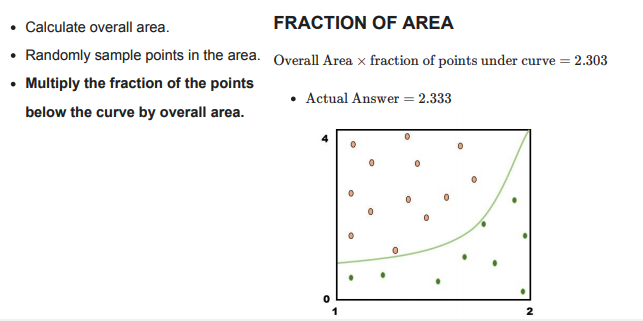

In [39]:
from IPython.display import Math
Math(r'F(x) = \int_{0}^{1} x e^{x} dx')

<IPython.core.display.Math object>

In [40]:
# Define the sim_integrate function above
def sim_integrate(func, xmin, xmax, sims):
    x = np.random.uniform(xmin, xmax, sims)
    y = np.random.uniform(min(min(func(x)), 0), max(func(x)), sims)
    area = (max(y) - min(y))*(xmax-xmin)
    result = area * sum(abs(y) < abs(func(x)))/sims
    return result

# Call the sim_integrate function and print results
result = sim_integrate(func = lambda x: x*np.exp(x), xmin = 0, xmax = 1, sims = 50)
print("Simulated answer = {}, Actual Answer = 1".format(result))

Simulated answer = 0.6748283351768631, Actual Answer = 1


In [43]:
# Calculating the value of pi
# Initialize sims and circle_points
sims, circle_points = 10000, 0 

for i in range(sims):
    # Generate the two coordinates of a point
    point = np.random.uniform(-1,1,size=2)
    # if the point lies within the unit circle, increment counter
    within_circle = point[0]**2 + point[1]**2 <= 1
    if within_circle == True:
        circle_points +=1
        
# Estimate pi as 4 times the avg number of points in the circle.
print("Simulated value of pi = {}".format(4*np.mean(circle_points)/sims))

Simulated value of pi = 3.1532


#### Simulation for Power Analysis
* What Is Power? - http://www.statisticsteacher.org/2017/09/15/what-is-power/
* Power = P (rejecting Null∣true alternative) Probability of detecting an effect if it exists. 
* Depends on sample size, α and effect size. Typically 80% power recommended for α = 0.05.

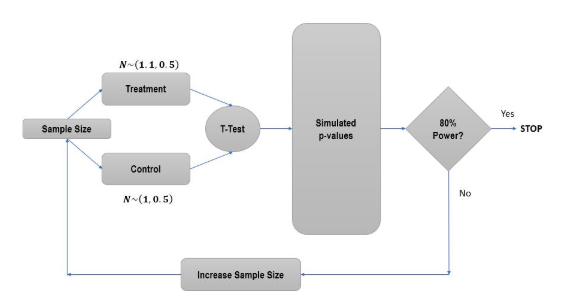

In [48]:
from scipy import stats

In [51]:
# Initialize effect_size, sample_size, control_mean, control_sd
effect_size, sample_size, control_mean, control_sd = 0.05, 50, 1, 0.5

# Simulate control_time_spent and treatment_time_spent, assuming equal variance
control_time_spent = np.random.normal(loc=control_mean, scale=control_sd, size=sample_size)
treatment_time_spent = np.random.normal(loc=control_mean*(1+effect_size), scale=control_sd, size=sample_size)

# Run the t-test and get the p_value
t_stat, p_value = stats.ttest_ind(treatment_time_spent, control_time_spent)
print("P-value: {}, Statistically Significant? {}".format(p_value, p_value < 0.05))

P-value: 0.2726945198826738, Statistically Significant? False


For our website, we want to know how many people need to visit each variant, such that we can detect a 10% increase in time spent with 80% power. For this, we start with a small sample (50), simulate multiple instances of this experiment & check power. If 80% power is reached, we stop. If not, we increase the sample size & try again.

In [53]:
sample_size = 50,sims= 10000

# Keep incrementing sample size by 10 till we reach required power
while 1:
    control_time_spent = np.random.normal(loc=control_mean, scale=control_sd, size=(sample_size, sims))
    treatment_time_spent = np.random.normal(loc=control_mean*(1+effect_size), scale=control_sd, size=(sample_size, sims))
    t, p = stats.ttest_ind(treatment_time_spent, control_time_spent)
    
    # Power is the fraction of times in the simulation when the p-value was less than 0.05
    power = (p < 0.05).sum()/sims
    if power >= 0.8: 
        break
    else: 
        sample_size += 10
print("For 80% power, sample size required = {}".format(sample_size))

For 80% power, sample size required = 1560


#### Applications in Finance
Suppose you have invested $10,000 in your portfolio comprising of multiple stocks. You want to evaluate the portfolio's performance over 10 years. You can tweak your overall expected rate of return and volatility (standard deviation of the rate of return). Assume the rate of return follows a normal distribution.

In [55]:
# rates is a Normal random variable and has size equal to number of years
def portfolio_return(yrs, avg_return, sd_of_return, principal):
    np.random.seed(123)
    rates = np.random.normal(loc=avg_return, scale=sd_of_return, size=yrs)
    # Calculate the return at the end of the period
    end_return = principal
    for x in rates:
        end_return = end_return*(1+x)
    return end_return

result = portfolio_return(yrs = 5, avg_return = 0.07, sd_of_return = 0.15, principal = 1000)
print("Portfolio return after 5 years = {}".format(result))

Portfolio return after 5 years = 1021.4013412039292


Your stock-heavy portfolio has an initial investment of $10,000, an expected return of 7% and a volatility of 30%. You want to get a 95% confidence interval of what your investment will be worth in 10 years. We will simulate multiple samples of 10-year returns and calculate the confidence intervals on the distribution of returns.

In [57]:
# Run 1,000 iterations and store the results
sims = 1000
rets = []

for i in range(sims):
    rets.append(portfolio_return(yrs = 10,
                                 avg_return = 0.07, 
                                 sd_of_return = 0.3, # volatility
                                 principal = 10000))

# Calculate the 95% CI
print("95% CI of Returns: Lower = {}, Upper = {}".format(np.percentile(rets, 2.5), np.percentile(rets, 97.5)))

95% CI of Returns: Lower = 3859.345207073691, Upper = 3859.345207073691


Let's go back to your stock-heavy portfolio with an expected return of 7% and a volatility of 30%. You have the choice of rebalancing your portfolio with some bonds such that the expected return is 4% & volatility is 10%. You have a principal of $10,000. You want to select a strategy based on how much your portfolio will be worth in 10 years. Let's simulate returns for both the portfolios and choose based on the least amount you can expect with 75% probability (25th percentile).

In [ ]:
# rets_stock is a pre-loaded df
for i in range(sims):
    rets_stock.append(portfolio_return(yrs = 10, avg_return = 0.07, sd_of_return = 0.3, principal = 10000))
    rets_bond.append(portfolio_return(yrs = 10, avg_return = 0.04, sd_of_return = 0.1, principal = 10000))

# Calculate the 25th percentile of the distributions and the amount you'd lose or gain
rets_stock_perc = np.percentile(rets_stock, 25)
rets_bond_perc = np.percentile(rets_bond, 25)
print("Sticking to stocks gets you an additional return of {}".format(rets_stock_perc - rets_bond_perc))